In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
from mplsoccer import Pitch, VerticalPitch

In [2]:
# Load stories, Possesion_id
df_stories = pd.read_parquet(r"C:\Users\papad\OneDrive\Desktop\Study\MSc Data Science\25-26\HT25-1\Mathematical Modelling of Football\Assingment 3\data\18768058_stories.parquet")

# Load runs
df_runs = pd.read_parquet(r"C:\Users\papad\OneDrive\Desktop\Study\MSc Data Science\25-26\HT25-1\Mathematical Modelling of Football\Assingment 3\data\18768058_runs.parquet") 

In [3]:
df_stories.columns

Index(['id', 'player_id', 'team_id', 'minute', 'second', 'period', 'start_x',
       'start_y', 'end_x', 'end_y',
       ...
       'possession_transition_medium', 'possession_counterattack',
       'possession_direct_free_kick', 'possession_penalty', 'match_time',
       'approx_match_time', 'season', 'match_id', 'competition',
       'possession_team'],
      dtype='object', length=150)

In [4]:
df_stories.head()

,id,player_id,team_id,minute,second,period,start_x,start_y,end_x,end_y,...,possession_transition_medium,possession_counterattack,possession_direct_free_kick,possession_penalty,match_time,approx_match_time,season,match_id,competition,possession_team
82,1670470694,11051,1625,4,51,1,76,80,70,69,...,False,False,False,False,291,286650.0,2022,5345058,108,home_team
83,1670470696,14808,1625,4,52,1,70,69,78,55,...,False,False,False,False,292,287664.0,2022,5345058,108,home_team
84,1670470697,14808,1625,4,54,1,78,55,78,43,...,False,False,False,False,294,289448.0,2022,5345058,108,home_team
85,1670470700,9380,1625,4,55,1,78,43,77,56,...,False,False,False,False,295,290493.0,2022,5345058,108,home_team
86,1670470702,9380,1625,4,57,1,77,56,73,64,...,False,False,False,False,297,292499.0,2022,5345058,108,home_team


In [5]:
df_runs.columns

Index(['player_id', 'jersey', 'team', 'frame_start', 'frame_end', 'start_x',
       'start_y', 'end_x', 'end_y', 'max_speed', 'avg_speed', 'player',
       'period', 'time_start', 'time_end', 'team_name', 'attacking_right',
       'wy_player_id', 'team_id', 'approx_time_start', 'approx_time_end',
       'Forward runs', 'Distance', 'Runs into box', 'xGRun',
       'In possession runs', 'possession_id', 'Target'],
      dtype='object')

In [6]:
df_runs.head()

,player_id,jersey,team,frame_start,frame_end,start_x,start_y,end_x,end_y,max_speed,...,team_id,approx_time_start,approx_time_end,Forward runs,Distance,Runs into box,xGRun,In possession runs,possession_id,Target
0,home_team_player_10,10,home_team,1279,1357,54.198198,81.201682,35.902647,91.648976,25.990283,...,1625,51160.0,54280.0,False,20.481841,False,0.0000,False,1670469650,False
1,home_team_player_10,10,home_team,7216,7250,78.752550,74.942682,84.251781,66.981610,21.529320,...,1625,288640.0,290000.0,True,7.915024,True,0.0615,True,1670470679,False
2,home_team_player_10,10,home_team,14178,14250,59.866674,82.591450,71.969354,61.423390,26.396568,...,1625,567120.0,570000.0,False,19.201143,False,0.0000,False,1670469841,False
3,home_team_player_10,10,home_team,14378,14419,68.775642,62.520785,63.918346,73.883564,20.566030,...,1625,575120.0,576760.0,False,9.258152,False,0.0000,False,1670469841,False
4,home_team_player_10,10,home_team,14633,14668,27.751955,65.643166,20.801524,61.318118,20.471871,...,1625,585320.0,586720.0,False,7.868277,False,0.0000,False,1670469841,False


In [7]:
df_runs["player"].unique()

array(['Jack Grealish', 'Rodri', 'Kevin De Bruyne', 'Bernardo Silva',
       'Manuel Akanji', 'Rúben Dias', 'Phil Foden', 'John Stones',
       'Nathan Aké', 'İlkay Gündoğan', 'Erling Haaland', 'Kyle Walker',
       'Lautaro Martínez', 'Francesco Acerbi', 'Denzel Dumfries',
       'Hakan Çalhanoğlu', 'Nicolò Barella', 'Federico Dimarco',
       'Matteo Darmian', 'Marcelo Brozović', 'Edin Džeko',
       'Alessandro Bastoni', 'Raoul Bellanova', 'Henrikh Mkhitaryan',
       'André Onana', "Danilo D'Ambrosio", 'Robin Gosens',
       'Romelu Lukaku'], dtype=object)

In [8]:
# --- Filter by player ---
player_name = "İlkay Gündoğan"   # Example player
#player_name =  df_runs["player"].unique()[0]
player_runs = df_runs[df_runs['player'] == player_name]

In [9]:
player_runs

,player_id,jersey,team,frame_start,frame_end,start_x,start_y,end_x,end_y,max_speed,...,team_id,approx_time_start,approx_time_end,Forward runs,Distance,Runs into box,xGRun,In possession runs,possession_id,Target
326,home_team_player_8,8,home_team,1324,1363,41.853343,62.470110,33.761478,65.548187,20.412128,...,1625,52960.0,54520.0,False,8.750476,False,0.0000,False,1670469650,False
327,home_team_player_8,8,home_team,3252,3278,46.400264,45.875658,50.147026,39.318522,20.997260,...,1625,130080.0,131120.0,False,5.946302,False,0.0000,False,1670469663,False
328,home_team_player_8,8,home_team,3606,3662,60.660041,65.123585,70.072955,78.706746,22.776938,...,1625,144240.0,146480.0,False,13.527697,False,0.0000,False,1670469663,False
329,home_team_player_8,8,home_team,7175,7282,64.021453,74.604271,86.379697,50.244356,26.485672,...,1625,287000.0,291280.0,True,28.731874,True,0.0615,True,1670470679,True
330,home_team_player_8,8,home_team,8429,8470,60.402724,45.824185,55.047809,34.879516,20.910190,...,1625,337160.0,338800.0,False,9.327553,False,0.0000,False,1670469711,False
331,home_team_player_8,8,home_team,11086,11147,66.081460,70.780798,55.757226,88.329198,25.834378,...,1625,443440.0,445880.0,False,16.121713,False,0.0000,False,-1,False
332,home_team_player_8,8,home_team,14407,14459,54.249800,47.640519,49.391942,64.477783,22.752964,...,1625,576280.0,578360.0,False,12.534154,False,0.0000,False,1670469841,False
333,home_team_player_8,8,home_team,14550,14659,43.175597,62.249978,21.794015,47.244045,21.057078,...,1625,582000.0,586360.0,False,24.660789,False,0.0000,False,1670469841,False
334,home_team_player_8,8,home_team,21979,22019,52.479017,59.645498,43.488712,58.749871,22.080656,...,1625,879160.0,880760.0,False,9.459445,False,0.0000,False,1670469981,False
335,home_team_player_8,8,home_team,28286,28318,64.893475,79.770568,58.947884,74.562666,20.381389,...,1625,1131440.0,1132720.0,False,7.177378,False,0.0000,False,-1,False


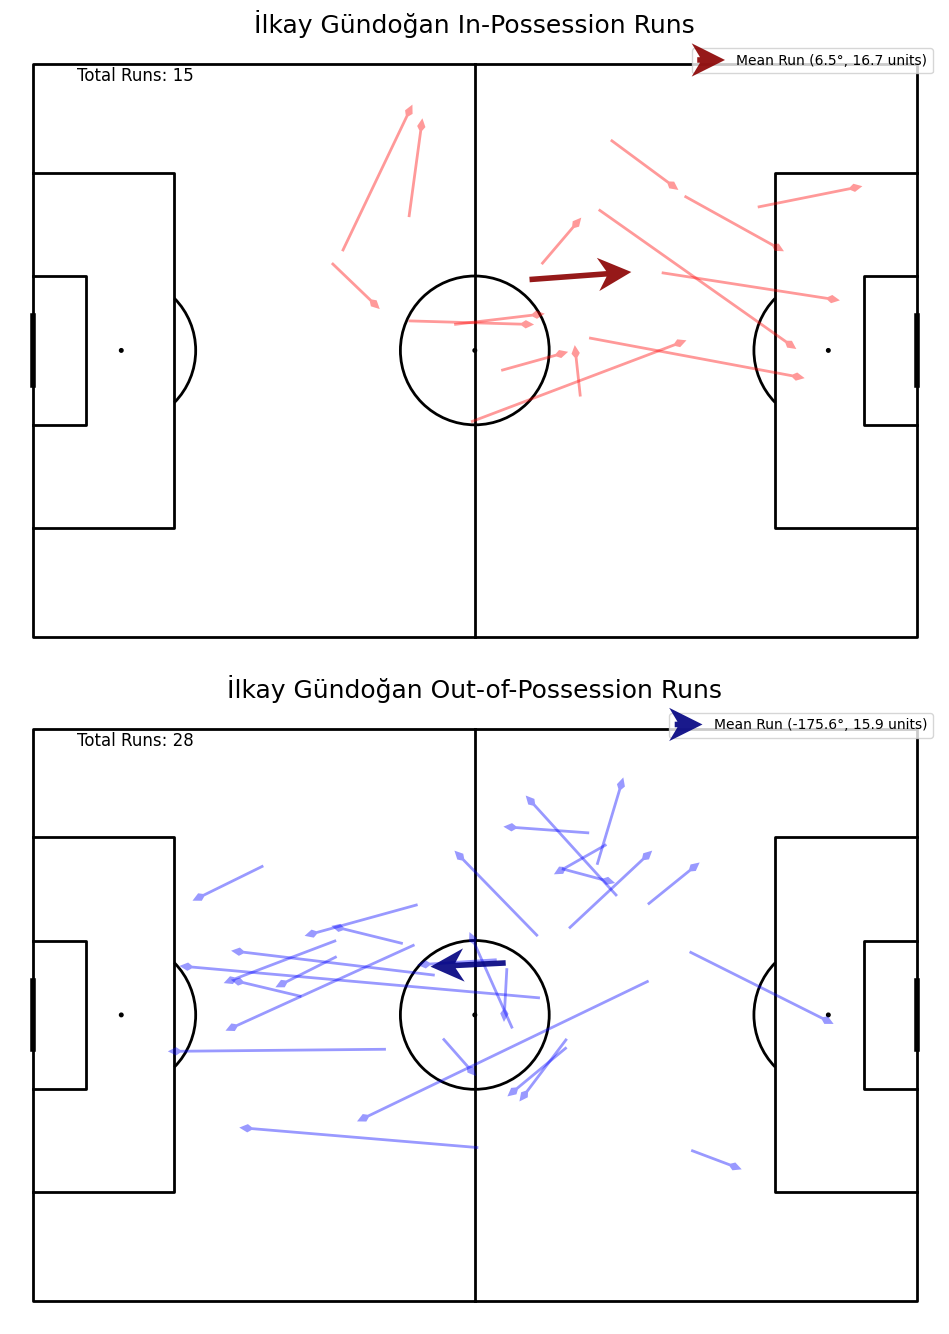

In [10]:
import numpy as np
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# --- Separate in-possession and out-of-possession runs ---
in_possession_runs = player_runs[player_runs['In possession runs'] == 1].copy()
out_possession_runs = player_runs[player_runs['In possession runs'] == 0].copy()

# --- Function to compute average vector and distance ---
def get_avg_vector(df):
    if len(df) == 0:
        return None
    avg_start_x = df['start_x'].mean()
    avg_start_y = df['start_y'].mean()
    avg_end_x = df['end_x'].mean()
    avg_end_y = df['end_y'].mean()
    dx = avg_end_x - avg_start_x
    dy = avg_end_y - avg_start_y
    avg_angle = np.degrees(np.arctan2(dy, dx))
    avg_distance = np.mean(np.sqrt(df['dx']**2 + df['dy']**2)) 
    return avg_start_x, avg_start_y, avg_end_x, avg_end_y, avg_angle, avg_distance

# --- Compute averages ---
for runs_df in [in_possession_runs, out_possession_runs]:
    runs_df['dx'] = runs_df['end_x'] - runs_df['start_x']
    runs_df['dy'] = runs_df['end_y'] - runs_df['start_y']

in_avg = get_avg_vector(in_possession_runs)
out_avg = get_avg_vector(out_possession_runs)

# --- Create pitch object ---
pitch = Pitch(pitch_type='wyscout', pitch_color='white', line_color='black')

# --- Create two subplots stacked vertically ---
fig, axes = plt.subplots(2, 1, figsize=(10, 14))

# =====================
# In-possession runs
# =====================
pitch.draw(ax=axes[0])
axes[0].invert_yaxis()

pitch.arrows(
    in_possession_runs['start_x'], in_possession_runs['start_y'],
    in_possession_runs['end_x'], in_possession_runs['end_y'],
    color='red', width=2, headwidth=3, headlength=3, alpha=0.4, ax=axes[0]
)

if in_avg:
    avg_start_x, avg_start_y, avg_end_x, avg_end_y, avg_angle, avg_distance = in_avg
    pitch.arrows(avg_start_x, avg_start_y, avg_end_x, avg_end_y,
                 color='darkred', width=4, headwidth=6, headlength=6, alpha=0.9, ax=axes[0],
                 label=f"Mean Run ({avg_angle:.1f}°, {avg_distance:.1f} units)")
    axes[0].legend(loc='upper right')

axes[0].set_title(f"{player_name} In-Possession Runs", fontsize=18)
axes[0].text(5, 97, f"Total Runs: {len(in_possession_runs)}", fontsize=12)

# =====================
# Out-of-possession runs
# =====================
pitch.draw(ax=axes[1])
axes[1].invert_yaxis()

pitch.arrows(
    out_possession_runs['start_x'], out_possession_runs['start_y'],
    out_possession_runs['end_x'], out_possession_runs['end_y'],
    color='blue', width=2, headwidth=3, headlength=3, alpha=0.4, ax=axes[1]
)

if out_avg:
    avg_start_x, avg_start_y, avg_end_x, avg_end_y, avg_angle, avg_distance = out_avg
    pitch.arrows(avg_start_x, avg_start_y, avg_end_x, avg_end_y,
                 color='navy', width=4, headwidth=6, headlength=6, alpha=0.9, ax=axes[1],
                 label=f"Mean Run ({avg_angle:.1f}°, {avg_distance:.1f} units)")
    axes[1].legend(loc='upper right')

axes[1].set_title(f"{player_name} Out-of-Possession Runs", fontsize=18)
axes[1].text(5, 97, f"Total Runs: {len(out_possession_runs)}", fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [11]:
# --- Define the penalty box dimensions (Wyscout coordinates, attacking right) ---
# Standard box: from x = 100–100-16.5 = 83.5 to 100, and y between 21.1 and 78.9
BOX_X_MIN = 83.5
BOX_Y_MIN = 21.1
BOX_Y_MAX = 78.9

# --- Adjust orientation if team attacks left (optional) ---
if 'attacking_right' in in_possession_runs.columns:
    if not in_possession_runs['attacking_right'].iloc[0]:
        # Flip X coordinates so attack direction is always rightward
        in_possession_runs['start_x'] = 100 - in_possession_runs['start_x']
        in_possession_runs['end_x'] = 100 - in_possession_runs['end_x']

# --- Identify runs ending inside the box ---
in_possession_runs['in_box'] = (
    (in_possession_runs['end_x'] >= BOX_X_MIN) &
    (in_possession_runs['end_y'] >= BOX_Y_MIN) &
    (in_possession_runs['end_y'] <= BOX_Y_MAX)
)

# --- Compute the metric ---
total_runs = len(in_possession_runs)
runs_in_box = in_possession_runs['in_box'].sum()
box_run_ratio = runs_in_box / total_runs if total_runs > 0 else 0

print(f"{player_name} made {runs_in_box} runs ending inside the box out of {total_runs} total runs.")
print(f"Proportion of runs ending inside the box: {box_run_ratio:.2%}")

İlkay Gündoğan made 5 runs ending inside the box out of 15 total runs.
Proportion of runs ending inside the box: 33.33%


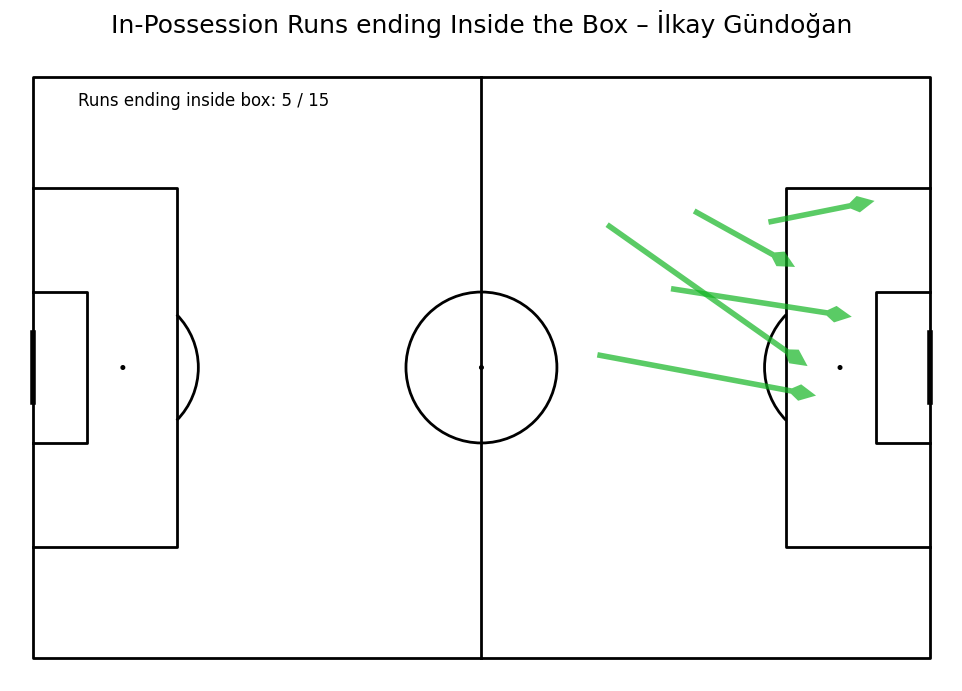

In [12]:
# --- Filter only those ending inside the box ---
in_possession_box_runs = in_possession_runs[in_possession_runs['in_box']]

# --- Create pitch ---
pitch = Pitch(pitch_type='wyscout', pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(10, 7))
fig.suptitle(f"In-Possession Runs ending Inside the Box – {player_name}", fontsize=18)
ax.invert_yaxis()  # 👈 Flip Y-axis here

# --- Plot arrows ---
pitch.arrows(
    in_possession_box_runs['start_x'], in_possession_box_runs['start_y'],
    in_possession_box_runs['end_x'], in_possession_box_runs['end_y'],
    color="#14B524", width=4, headwidth=3, headlength=3, alpha=0.7, ax=ax
)

# --- Add text info ---
ax.text(5, 95, f"Runs ending inside box: {len(in_possession_box_runs)} / {len(in_possession_runs)}", fontsize=12)

plt.show()


In [13]:

# --- Define box boundaries (Wyscout coordinates, attacking right) ---
BOX_X_MIN = 83.5
BOX_Y_MIN = 21.1
BOX_Y_MAX = 78.9

# --- Work on the filtered dataset ---
df = df_runs.copy()

# --- Keep only in-possession runs ---
df = df[df['In possession runs'] == 1]

# --- Adjust orientation for each team if needed ---
if 'attacking_right' in df.columns:
    df.loc[df['attacking_right'] == False, ['start_x', 'end_x']] = 100 - df.loc[df['attacking_right'] == False, ['start_x', 'end_x']]

# --- Flag runs ending inside the box ---
df['in_box'] = (
    (df['end_x'] >= BOX_X_MIN) &
    (df['end_y'] >= BOX_Y_MIN) &
    (df['end_y'] <= BOX_Y_MAX)
)

# --- Compute the percentage of runs ending in the box for each player ---
box_ratio_by_player = (
    df.groupby(['player', 'team_name'])
    .agg(total_runs=('player_id', 'count'),
         runs_in_box=('in_box', 'sum'))
    .reset_index()
)
box_ratio_by_player['box_run_ratio'] = box_ratio_by_player['runs_in_box'] / box_ratio_by_player['total_runs']

# --- Sort descending and display top 10 ---
box_ratio_by_player = box_ratio_by_player.sort_values('box_run_ratio', ascending=False)

print(box_ratio_by_player.head(10))

                player        team_name  total_runs  runs_in_box  \
23       Romelu Lukaku            Inter           8            3   
4       Erling Haaland  Manchester City          12            4   
21        Robin Gosens            Inter           6            2   
25      İlkay Gündoğan  Manchester City          15            5   
19          Phil Foden  Manchester City          20            6   
7     Hakan Çalhanoğlu            Inter           7            2   
8   Henrikh Mkhitaryan            Inter           4            1   
9        Jack Grealish  Manchester City          14            3   
5     Federico Dimarco            Inter          15            2   
3           Edin Džeko            Inter           9            1   

    box_run_ratio  
23       0.375000  
4        0.333333  
21       0.333333  
25       0.333333  
19       0.300000  
7        0.285714  
8        0.250000  
9        0.214286  
5        0.133333  
3        0.111111  
